## Export netCDF varibales as TIFS to share 

* `cer_treatment_region_dataset_simple.nc` : simple, with only required varibales 
* `cer_treatment_region_dataset_all_variables.nc` : with all the extras 

For now, I am doing this to share with Susan. 

* using env `raster`, and had to update an issue with netCDF4 and h5netcdf

In [1]:
# import packages 
%matplotlib inline

# plotting packages 
import matplotlib as mpl
import matplotlib.pyplot as plt

# data packages 
import pandas as pd
import numpy as np
import xarray as xr
from datetime import datetime

import csv 
import copy 
import os.path 

import geopandas as gpd
# import rasterio as rio
from rasterio.warp import calculate_default_transform, reproject, Resampling
import rioxarray
import rasterio

In [2]:
# I copied the simple version of the dataset here to open and export rasters
# read netcdf file
ds = xr.open_dataset('/home/lumbraca/raster/data/cer_treatment_region_dataset_simple.nc')

In [3]:
ds

<xarray.Dataset>
Dimensions:             (x: 2564, y: 1388, band: 1)
Coordinates:
  * x                   (x) float64 4.65e+05 4.65e+05 ... 4.676e+05 4.676e+05
  * y                   (y) float64 2.111e+05 2.111e+05 ... 2.097e+05 2.097e+05
  * band                (band) int32 1
    spatial_ref         int32 ...
Data variables: (12/30)
    chmws_rapid         (band, y, x) float32 ...
    dce_rapid           (band, y, x) float32 ...
    giulia_dce_rapid    (band, y, x) float32 ...
    giulia_dce_ncalm    (band, y, x) float32 ...
    baf_old             (band, y, x) float32 ...
    baf_new             (band, y, x) float32 ...
    ...                  ...
    hs_ncalm            (band, y, x) float32 ...
    dem                 (band, y, x) float32 ...
    hs_rapid            (band, y, x) float32 ...
    chmas_rapid         (band, y, x) float32 ...
    dtm_rapid           (band, y, x) float32 ...
    dsm_rapid           (band, y, x) float32 ...

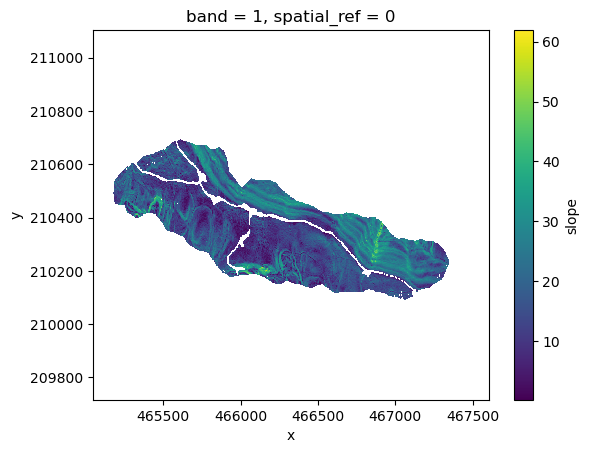

In [4]:
ds['slope'].plot()

In [6]:
# location to save all the files to... 
# /storage/lumbraca/cer_treatment_region_datasets

In [ ]:
# landscape variables
ds['slope'].rio.to_raster('/storage/lumbraca/cer_treatment_region_datasets/slope.tif')
ds['aspect'].rio.to_raster('/storage/lumbraca/cer_treatment_region_datasets/aspect.tif')
ds['dah'].rio.to_raster('/storage/lumbraca/cer_treatment_region_datasets/dah.tif') # heat index 
ds['tpi'].rio.to_raster('/storage/lumbraca/cer_treatment_region_datasets/tpi.tif') # topographic position index

# snowoff 
ds['dtm_snowoff'].rio.to_raster('/storage/lumbraca/cer_treatment_region_datasets/dtm_snowoff.tif')
ds['dsm_snowoff'].rio.to_raster('/storage/lumbraca/cer_treatment_region_datasets/dsm_snowoff.tif')

ds['dem'].rio.to_raster('/storage/lumbraca/cer_treatment_region_datasets/dem_snowoff.tif') # dtm in correct units 
ds['chm_snowoff'].rio.to_raster('/storage/lumbraca/cer_treatment_region_datasets/chm_snowoff.tif') # dsm - dtm in correct units 

ds['dce_snowoff'].rio.to_raster('/storage/lumbraca/cer_treatment_region_datasets/dce_snowoff.tif') # cassie dce 
ds['giulia_dce_snowoff'].rio.to_raster('/storage/lumbraca/cer_treatment_region_datasets/giulia_dce_snowoff.tif') # giulia dce 

# ncalm
ds['dtm_ncalm'].rio.to_raster('/storage/lumbraca/cer_treatment_region_datasets/dtm_ncalm.tif')
ds['dsm_ncalm'].rio.to_raster('/storage/lumbraca/cer_treatment_region_datasets/dsm_ncalm.tif')

ds['chmws_ncalm'].rio.to_raster('/storage/lumbraca/cer_treatment_region_datasets/chmws_ncalm.tif') # chm with  snow (chmws)
ds['chmas_ncalm'].rio.to_raster('/storage/lumbraca/cer_treatment_region_datasets/chmas_ncalm.tif') # chm above snow (chmas)

ds['hs_ncalm'].rio.to_raster('/storage/lumbraca/cer_treatment_region_datasets/hs_ncalm.tif')
ds['dce_ncalm'].rio.to_raster('/storage/lumbraca/cer_treatment_region_datasets/dce_ncalm.tif') # cassie dce
ds['giulia_dce_ncalm'].rio.to_raster('/storage/lumbraca/cer_treatment_region_datasets/giulia_dce_ncalm.tif') # giulia dce 

# rapid 
ds['dtm_rapid'].rio.to_raster('/storage/lumbraca/cer_treatment_region_datasets/dtm_rapid.tif')
ds['dsm_rapid'].rio.to_raster('/storage/lumbraca/cer_treatment_region_datasets/dsm_rapid.tif')

ds['chmws_rapid'].rio.to_raster('/storage/lumbraca/cer_treatment_region_datasets/chmws_rapid.tif') # chm with  snow (chmws)
ds['chmas_rapid'].rio.to_raster('/storage/lumbraca/cer_treatment_region_datasets/chmas_rapid.tif') # chm above snow (chmas)

ds['hs_rapid'].rio.to_raster('/storage/lumbraca/cer_treatment_region_datasets/hs_rapid.tif')
ds['dce_rapid'].rio.to_raster('/storage/lumbraca/cer_treatment_region_datasets/dce_rapid.tif') # cassie dce
ds['giulia_dce_rapid'].rio.to_raster('/storage/lumbraca/cer_treatment_region_datasets/giulia_dce_rapid.tif') # giulia dce 

# treatment related 
ds['boundary'].rio.to_raster('/storage/lumbraca/cer_treatment_region_datasets/boundary.tif') # rapid lidar conservative boundary
ds['road'].rio.to_raster('/storage/lumbraca/cer_treatment_region_datasets/road.tif') # binary raster of the ridge road 
ds['baf_ridge'].rio.to_raster('/storage/lumbraca/cer_treatment_region_datasets/side_of_ridge.tif') # binary raster of the ridge of the ridge 
ds['baf_plots'].rio.to_raster('/storage/lumbraca/cer_treatment_region_datasets/timeseries_plots.tif') # 10x10 WY2023 timeseries plots rasterized 
ds['baf_new'].rio.to_raster('/storage/lumbraca/cer_treatment_region_datasets/BAF_treatment_polygons.tif') # BAF treatment polygons rasterized for BAF values 